<a href="https://colab.research.google.com/github/Mutasar/Membangun-Proyek-Machine-Learning/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Mutasar_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [47]:
#Type your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import joblib


from google.colab import files


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [51]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe

df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [23]:
# Mengecek dataset menggunakan isnull().sum()

print("Cek nilai null:\n", df.isnull().sum())

Cek nilai null:
 TransactionAmount          26
TransactionDate            28
TransactionType             0
Location                    0
Channel                     0
CustomerAge                18
CustomerOccupation          0
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [24]:
# Mengecek dataset menggunakan duplicated().sum()

print("\nJumlah duplikasi:", df.duplicated().sum())



Jumlah duplikasi: 1


In [25]:
#menghilangkan data duplikat
df = df.drop_duplicates()

In [26]:
#cek hasil drop duplikat
print("\nJumlah duplikasi:", df.duplicated().sum())


Jumlah duplikasi: 0


In [27]:
# Drop kolom ID jika ada
df = df.drop(columns=['TransactionID'], errors='ignore')  # Ganti dengan nama kolom ID sebenarnya

In [31]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.


# Pilih kolom numerik dari DataFrame
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Inisialisasi scaler
scaler = MinMaxScaler()

# Terapkan scaling dan masukkan hasilnya kembali ke df
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Tampilkan 5 baris pertama setelah scaling
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,0.5,0.837209,0.000000,0.838710,0.00,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,0.5,0.348837,0.000000,0.806452,0.00,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,0.5,0.534884,0.666667,0.016129,0.75,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,0.5,0.767442,0.666667,0.129032,0.75,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,0.0,0.023256,0.666667,NaN,0.75,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [32]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

columns_to_drop = [col for col in df.columns if 'id' in col.lower() or 'ip address' in col.lower()]
df = df.drop(columns=columns_to_drop)

# Display the columns after dropping
print(df.columns.tolist())

['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']


In [33]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

# Pilih kolom kategorikal (tipe data object atau string)
categorical_cols = df.select_dtypes(include=['object']).columns

# Inisialisasi encoder
encoder = LabelEncoder()

# Encode tiap kolom kategorikal
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))  # pastikan nilainya dalam bentuk string

# Tampilkan 5 baris pertama setelah encoding
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,0.5,0.837209,0.000000,0.838710,0.00,0.244828,0.0,0.336832,105
1,0.195940,1178,0.5,0.348837,0.000000,0.806452,0.00,0.451724,0.0,0.918055,192
2,0.065680,1262,0.5,0.534884,0.666667,0.016129,0.75,0.158621,0.0,0.068637,41
3,0.096016,818,0.5,0.767442,0.666667,0.129032,0.75,0.051724,0.0,0.569198,163
4,0.006874,1939,0.0,0.023256,0.666667,NaN,0.75,0.648276,0.0,0.492591,16


In [34]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [31]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).


In [32]:
# Menghapus data duplikat menggunakan drop_duplicates().


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut


In [34]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [35]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2489.000000,2515.000000,2515.000000,2515.000000,2515.000000,2497.000000,2515.000000,2489.000000,2494.000000,2488.000000,2515.000000
mean,0.155028,1256.121272,0.394036,0.495030,0.336912,0.429574,0.382604,0.377701,0.030674,0.337134,180.846521
std,0.152455,725.512424,0.218488,0.288270,0.276891,0.287308,0.287572,0.241363,0.149244,0.262029,103.957462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042260,628.500000,0.500000,0.255814,0.000000,0.145161,0.125000,0.182759,0.000000,0.094352,91.000000
50%,0.110014,1256.000000,0.500000,0.488372,0.333333,0.435484,0.500000,0.351724,0.000000,0.311592,181.000000
75%,0.214431,1884.500000,0.500000,0.744186,0.666667,0.661290,0.750000,0.520690,0.000000,0.509357,272.000000
max,1.000000,2485.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,360.000000


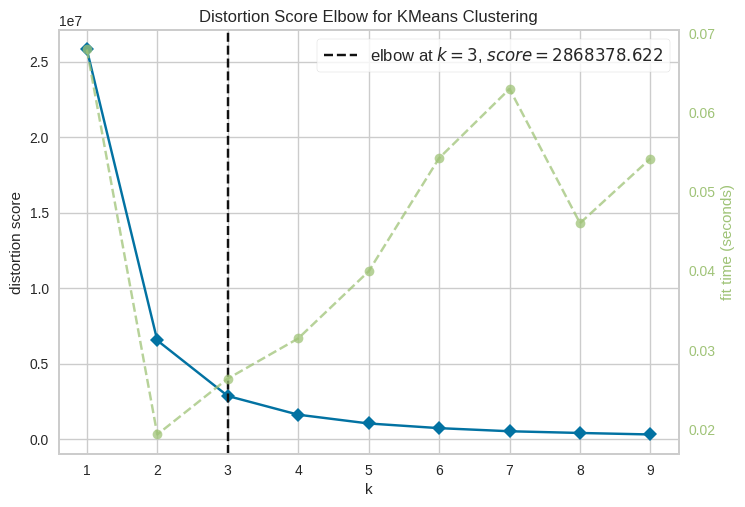

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
df_for_clustering = df_for_clustering.dropna()
visualizer.fit(df_for_clustering)
visualizer.show()


In [44]:
# Dropping rows with any missing values
df.dropna(inplace=True)

In [45]:
# Menggunakan algoritma K-Means Clustering

optimal_k = 4
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

kmeans_model.fit(df)


df['Cluster'] = kmeans_model.labels_

# Display the first few rows with the new cluster labels
print(df.head())

   TransactionAmount  TransactionDate  TransactionType  Location   Channel  \
0           0.007207              680              0.5  0.837209  0.000000   
1           0.195940             1178              0.5  0.348837  0.000000   
2           0.065680             1262              0.5  0.534884  0.666667   
3           0.096016              818              0.5  0.767442  0.666667   
5           0.047888              635              0.5  0.651163  0.000000   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     0.838710                0.00             0.244828            0.0   
1     0.806452                0.00             0.451724            0.0   
2     0.016129                0.75             0.158621            0.0   
3     0.129032                0.75             0.051724            0.0   
5     0.000000                0.75             0.558621            0.0   

   AccountBalance  PreviousTransactionDate  Cluster  
0        0.336832               

Jalankan cell code ini untuk menyimpan model kamu.

In [72]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")

joblib.dump(kmeans_model, "clustering.h5")

['clustering.h5']

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

In [ ]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [71]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.


# Select numerical columns, excluding the 'Cluster' column
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'Cluster' in numerical_cols:
    numerical_cols.remove('Cluster')

# Group by the 'Cluster' column and calculate descriptive statistics for numerical features
cluster_descriptives = df.groupby('Cluster')[numerical_cols].agg(['mean', 'min', 'max'])

# Display the descriptive statistics
print(cluster_descriptives)

KeyError: 'Cluster'

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

1.  **Cluster 0: (Pelaku Transaksi Moderat Awal/Pertengahan Tahun)**:
    -   **Rata-rata (mean) TransactionDate:** 951.16 (Sesuai dengan transaksi yang terjadi pada awal hingga pertengahan tahun)
    -   **Rata-rata (mean) TransactionAmount:** 0.149 (Jumlah transaksi yang relatif moderat)
    -   **Rata-rata (mean) AccountBalance:** 0.329 (Saldo akun rata-rata)
    -   **Analisis:** Cluster ini mencakup pelanggan yang cenderung melakukan transaksi di paruh pertama hingga pertengahan tahun. Jumlah transaksi mereka cenderung moderat, dan saldo akun mereka rata-rata.

2.  **Cluster 1: (Pelaku Transaksi Moderat Pertengahan Akhir Tahun)**:
    -   **Rata-rata (mean) TransactionDate:** 1582.13 (Sesuai dengan transaksi yang terjadi pada paruh kedua tahun, setelah Cluster 0)
    -   **Rata-rata (mean) TransactionAmount:** 0.166 (Jumlah transaksi rata-rata sedikit lebih tinggi dibandingkan Cluster 0)
    -   **Rata-rata (mean) AccountBalance:** 0.331 (Saldo akun rata-rata serupa dengan Cluster 0)
    -   **Analisis:** Cluster ini terdiri dari pelanggan yang bertransaksi di paruh akhir tahun. Rata-rata jumlah transaksi mereka sedikit lebih tinggi dibandingkan Cluster 0, dengan saldo akun yang serupa.

3.  **Cluster 2: (Pelaku Transaksi Moderat Awal Tahun)**:
    -   **Rata-rata (mean) TransactionDate:** 318.62 (Sesuai dengan transaksi yang terjadi di awal tahun)
    -   **Rata-rata (mean) TransactionAmount:** 0.153 (Jumlah transaksi moderat)
    -   **Rata-rata (mean) AccountBalance:** 0.336 (Saldo akun rata-rata sedikit lebih tinggi dibandingkan Cluster 0 dan 1)
    -   **Analisis:** Cluster ini mewakili pelanggan yang cenderung aktif di awal tahun. Mereka memiliki jumlah transaksi yang moderat dan rata-rata saldo akun yang sedikit lebih tinggi.

4.  **Cluster 3: (Pelaku Transaksi Akhir Tahun Moderat)**:
    -   **Rata-rata (mean) TransactionDate:** 2206.23 (Sesuai dengan transaksi yang terjadi menjelang akhir tahun)
    -   **Rata-rata (mean) TransactionAmount:** 0.151 (Jumlah transaksi moderat)
    -   **Rata-rata (mean) AccountBalance:** 0.343 (Saldo akun rata-rata tertinggi di antara semua cluster)
    -   **Analisis:** Cluster ini mencakup pelanggan yang bertransaksi menjelang akhir tahun. Mereka memiliki jumlah transaksi yang moderat namun dengan rata-rata saldo akun tertinggi.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [64]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
# Pastikan nama kolom clustering sudah diubah menjadi Target

# Pastikan nama kolom clustering sudah diubah menjadi Target

# Rename the 'Cluster' column to 'Target'
# Check if 'Cluster' column exists before renaming
if 'Target' in df.columns:
    df.rename(columns={'Target': 'AccountID'}, inplace=True)
    print("Column 'arget' renamed to 'AccountID'.")
elif 'TAccountID' in df.columns:
    print("Column is already named 'Target'.")
else:
    print("Neither 'Cluster' nor 'Target' column found in the DataFrame.")


# Display the column names to confirm the change
print(df.columns.tolist())

Column 'arget' renamed to 'AccountID'.
['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']


In [65]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [68]:
print(cluster_descriptives)

        TransactionAmount                     TransactionDate              \
                     mean       min       max            mean   min   max   
Cluster                                                                     
0                0.149033  0.000599  1.000000      951.166113   635  1267   
1                0.166234  0.000031  0.954092     1582.132328  1268  1895   
2                0.153174  0.000313  0.953561      318.625616     0   638   
3                0.151289  0.000000  0.858577     2206.238983  1896  2485   

        TransactionType            Location  ... TransactionDuration  \
                   mean  min  max      mean  ...                 max   
Cluster                                      ...                       
0              0.393688  0.0  1.0  0.498262  ...            0.993103   
1              0.391960  0.0  1.0  0.497604  ...            0.996552   
2              0.404762  0.0  1.0  0.498186  ...            0.996552   
3              0.386441  0.0

In [69]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)


# Simpan Data
df.to_csv('data_clustering.csv', index=False)

In [70]:
files.download('data_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

1.  **Cluster 0: (Pelaku Transaksi Moderat Awal/Pertengahan Tahun)**:
    -   **Rata-rata (mean) TransactionDate:** 951.16 (Sesuai dengan transaksi yang terjadi pada awal hingga pertengahan tahun)
    -   **Rata-rata (mean) TransactionAmount:** 0.149 (Jumlah transaksi yang relatif moderat)
    -   **Rata-rata (mean) AccountBalance:** 0.329 (Saldo akun rata-rata)
    -   **Analisis:** Cluster ini mencakup pelanggan yang cenderung melakukan transaksi di paruh pertama hingga pertengahan tahun. Jumlah transaksi mereka cenderung moderat, dan saldo akun mereka rata-rata.

2.  **Cluster 1: (Pelaku Transaksi Moderat Pertengahan Akhir Tahun)**:
    -   **Rata-rata (mean) TransactionDate:** 1582.13 (Sesuai dengan transaksi yang terjadi pada paruh kedua tahun, setelah Cluster 0)
    -   **Rata-rata (mean) TransactionAmount:** 0.166 (Jumlah transaksi rata-rata sedikit lebih tinggi dibandingkan Cluster 0)
    -   **Rata-rata (mean) AccountBalance:** 0.331 (Saldo akun rata-rata serupa dengan Cluster 0)
    -   **Analisis:** Cluster ini terdiri dari pelanggan yang bertransaksi di paruh akhir tahun. Rata-rata jumlah transaksi mereka sedikit lebih tinggi dibandingkan Cluster 0, dengan saldo akun yang serupa.

3.  **Cluster 2: (Pelaku Transaksi Moderat Awal Tahun)**:
    -   **Rata-rata (mean) TransactionDate:** 318.62 (Sesuai dengan transaksi yang terjadi di awal tahun)
    -   **Rata-rata (mean) TransactionAmount:** 0.153 (Jumlah transaksi moderat)
    -   **Rata-rata (mean) AccountBalance:** 0.336 (Saldo akun rata-rata sedikit lebih tinggi dibandingkan Cluster 0 dan 1)
    -   **Analisis:** Cluster ini mewakili pelanggan yang cenderung aktif di awal tahun. Mereka memiliki jumlah transaksi yang moderat dan rata-rata saldo akun yang sedikit lebih tinggi.

4.  **Cluster 3: (Pelaku Transaksi Akhir Tahun Moderat)**:
    -   **Rata-rata (mean) TransactionDate:** 2206.23 (Sesuai dengan transaksi yang terjadi menjelang akhir tahun)
    -   **Rata-rata (mean) TransactionAmount:** 0.151 (Jumlah transaksi moderat)
    -   **Rata-rata (mean) AccountBalance:** 0.343 (Saldo akun rata-rata tertinggi di antara semua cluster)
    -   **Analisis:** Cluster ini mencakup pelanggan yang bertransaksi menjelang akhir tahun. Mereka memiliki jumlah transaksi yang moderat namun dengan rata-rata saldo akun tertinggi.


(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [63]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.


In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)